[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\samir\AppData\Local\Temp\ipykernel_19512\1104048099.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


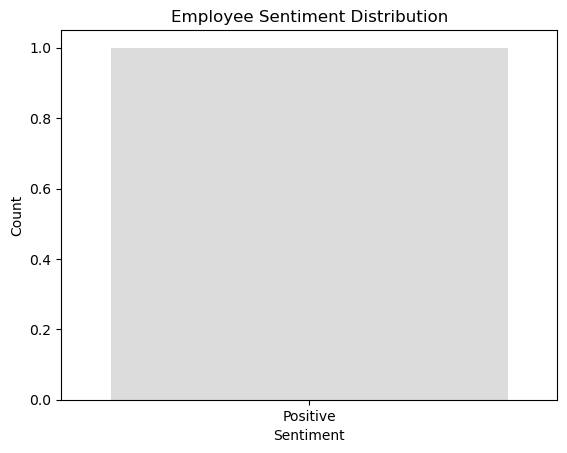

                                           file_name  \
0  E:\ProQSmart\Employee profiles\Supriya\Supriya...   

                                            feedback  sentiment_score  \
0  1  General Experience\nWhat led to your decisi...           0.9993   

  sentiment_category  
0           Positive  


In [7]:

import docx
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary nltk resources are downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def read_docx(file_path):
    """Reads text from a .docx file."""
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return "\n".join(full_text)

def analyze_sentiment(text):
    """Analyzes sentiment and returns the compound score."""
    scores = sia.polarity_scores(text)
    return scores['compound']

def classify_sentiment(score):
    """Classifies sentiment into Positive, Neutral, or Negative."""
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Define the file path for the Word document
file_path = r"E:\ProQSmart\Employee profiles\Supriya\Supriya -Exit Interivew - Questionnaire.docx"

# Process the single document
feedback_text = read_docx(file_path)
sentiment_score = analyze_sentiment(feedback_text)
sentiment_category = classify_sentiment(sentiment_score)

# Store results in a DataFrame
df = pd.DataFrame([[file_path, feedback_text, sentiment_score, sentiment_category]], 
                  columns=['file_name', 'feedback', 'sentiment_score', 'sentiment_category'])

# Save to CSV
df.to_csv("sentiment_analysis_results.csv", index=False)

# Visualize Sentiment Distribution
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Employee Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display results
print(df)
